# Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# Basic libraries
#
import time
import pandas    as pd
import numpy     as np
from   tqdm      import tqdm


# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# Visualization library
#
import matplotlib.pyplot   as plt 



# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
# User libraries
#
from non_parametric_tests import *
from PerformanceProfiles  import *

# Import data

In [3]:
df = pd.DataFrame([])
nProblems = 100

df['Method 1'] = np.random.rand(nProblems)
df['Method 2'] = np.random.rand(nProblems)
df['Method 3'] = np.random.rand(nProblems)
df['Method 4'] = np.random.rand(nProblems)

df.head( 3 )

,Method 1,Method 2,Method 3,Method 4
0,0.127516,0.419298,0.757823,0.399627
1,0.239875,0.100225,0.671564,0.924389
2,0.512183,0.931550,0.263105,0.576930


# Statistical analysis

- Derrac, J., García, S., Molina, D., & Herrera, F. (2011). A practical tutorial on the use of nonparametric statistical tests as a methodology for comparing evolutionary and swarm intelligence algorithms. Swarm and Evolutionary Computation, 1(1), 3-18.

- García, S., Fernández, A., Luengo, J., & Herrera, F. (2010). Advanced nonparametric tests for multiple comparisons in the design of experiments in computational intelligence and data mining: Experimental analysis of power. Information sciences, 180(10), 2044-2064.

## Friedman Aligned Ranking (FAR)

In [4]:
T, p_value, rankings_avg, rankings_cmp = friedman_aligned_ranks_test( df )


# Summary
#
print('\n')
print('[INFO] H0: {All methods exhibited similar results with no statistical differences}')
print('[INFO] FAR: %.3f (p-value: %.5f)' % (T, p_value))
if (p_value < 0.05):
    print('\t> H0 is rejected')
else:
    print('\t> H0 is failed to be rejected')

[INFO] Number of methods:   4
[INFO] Number of problems:  100


[INFO] H0: {All methods exhibited similar results with no statistical differences}
[INFO] FAR: 5.497 (p-value: 0.13883)
	> H0 is failed to be rejected


### FAR ranking

In [5]:
Ranking = pd.DataFrame( [] )
Ranking['Methods'] = df.columns
Ranking['FAR']     = rankings_avg

Ranking.sort_values(by = 'FAR')

,Methods,FAR
2,Method 3,177.92
0,Method 1,194.44
1,Method 2,212.14
3,Method 4,217.50


## Finner post-hoc test

In [6]:
### Create dictionary with rankings

d = {}
for i, feature in enumerate(df.columns):
    d[ feature ] = rankings_cmp[i] 

### Multiple comparisons ($1 \times N$)

**Finner post-hoc test**

In [7]:
comparisons, z_values, p_values, adj_p_values = finner_test( d )

Finner = pd.DataFrame( [] )
Finner['Comparisons']     = comparisons
Finner['APV']             = adj_p_values
Finner['Null hypothesis'] = Finner['APV'].apply(lambda x: 'Rejected' if x < 0.05 else 'Failed to reject')

Finner

[INFO] Control method:  Method 3


,Comparisons,APV,Null hypothesis
0,Method 3 vs Method 4,0.045750,Rejected
1,Method 3 vs Method 2,0.054035,Failed to reject
2,Method 3 vs Method 1,0.312315,Failed to reject


### Multiple comparisons ($N \times N$)

**Finner-multitest post-hoc test**

In [8]:
comparisons, z_values, p_values, adj_p_values = finner_multitest(d)

Finner = pd.DataFrame( [] )
Finner['Comparisons']     = comparisons
Finner['APV']             = adj_p_values
Finner['Null hypothesis'] = Finner['APV'].apply(lambda x: 'Rejected' if x < 0.05 else 'Failed to reject')

Finner

,Comparisons,APV,Null hypothesis
0,Method 3 vs Method 4,0.089407,Failed to reject
1,Method 2 vs Method 3,0.105151,Failed to reject
2,Method 1 vs Method 4,0.291761,Failed to reject
3,Method 1 vs Method 2,0.387799,Failed to reject
4,Method 1 vs Method 3,0.387799,Failed to reject
5,Method 2 vs Method 4,0.743046,Failed to reject


# Performance profiles

- Dolan, E. D., & Moré, J. J. (2002). Benchmarking optimization software with performance profiles. Mathematical programming, 91(2), 201-213.
ISO 690	


            Method 1 solved 23.00% of cases with the best(least) score
            Method 2 solved 26.00% of cases with the best(least) score
            Method 3 solved 34.00% of cases with the best(least) score
            Method 4 solved 17.00% of cases with the best(least) score


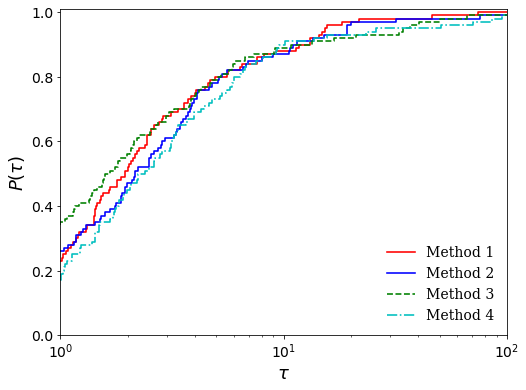

In [9]:
perfprof(df, 
         linespecs = ['r-', 'b-', 'g--', 'c-.'], 
         digit = 4,
         legendnames = df.columns,
         thmax = 100, figsize = (8, 6))

plt.xscale('log')